# <h1>Assignment 1<h1>
## Netflix Movies Analysis Using Python
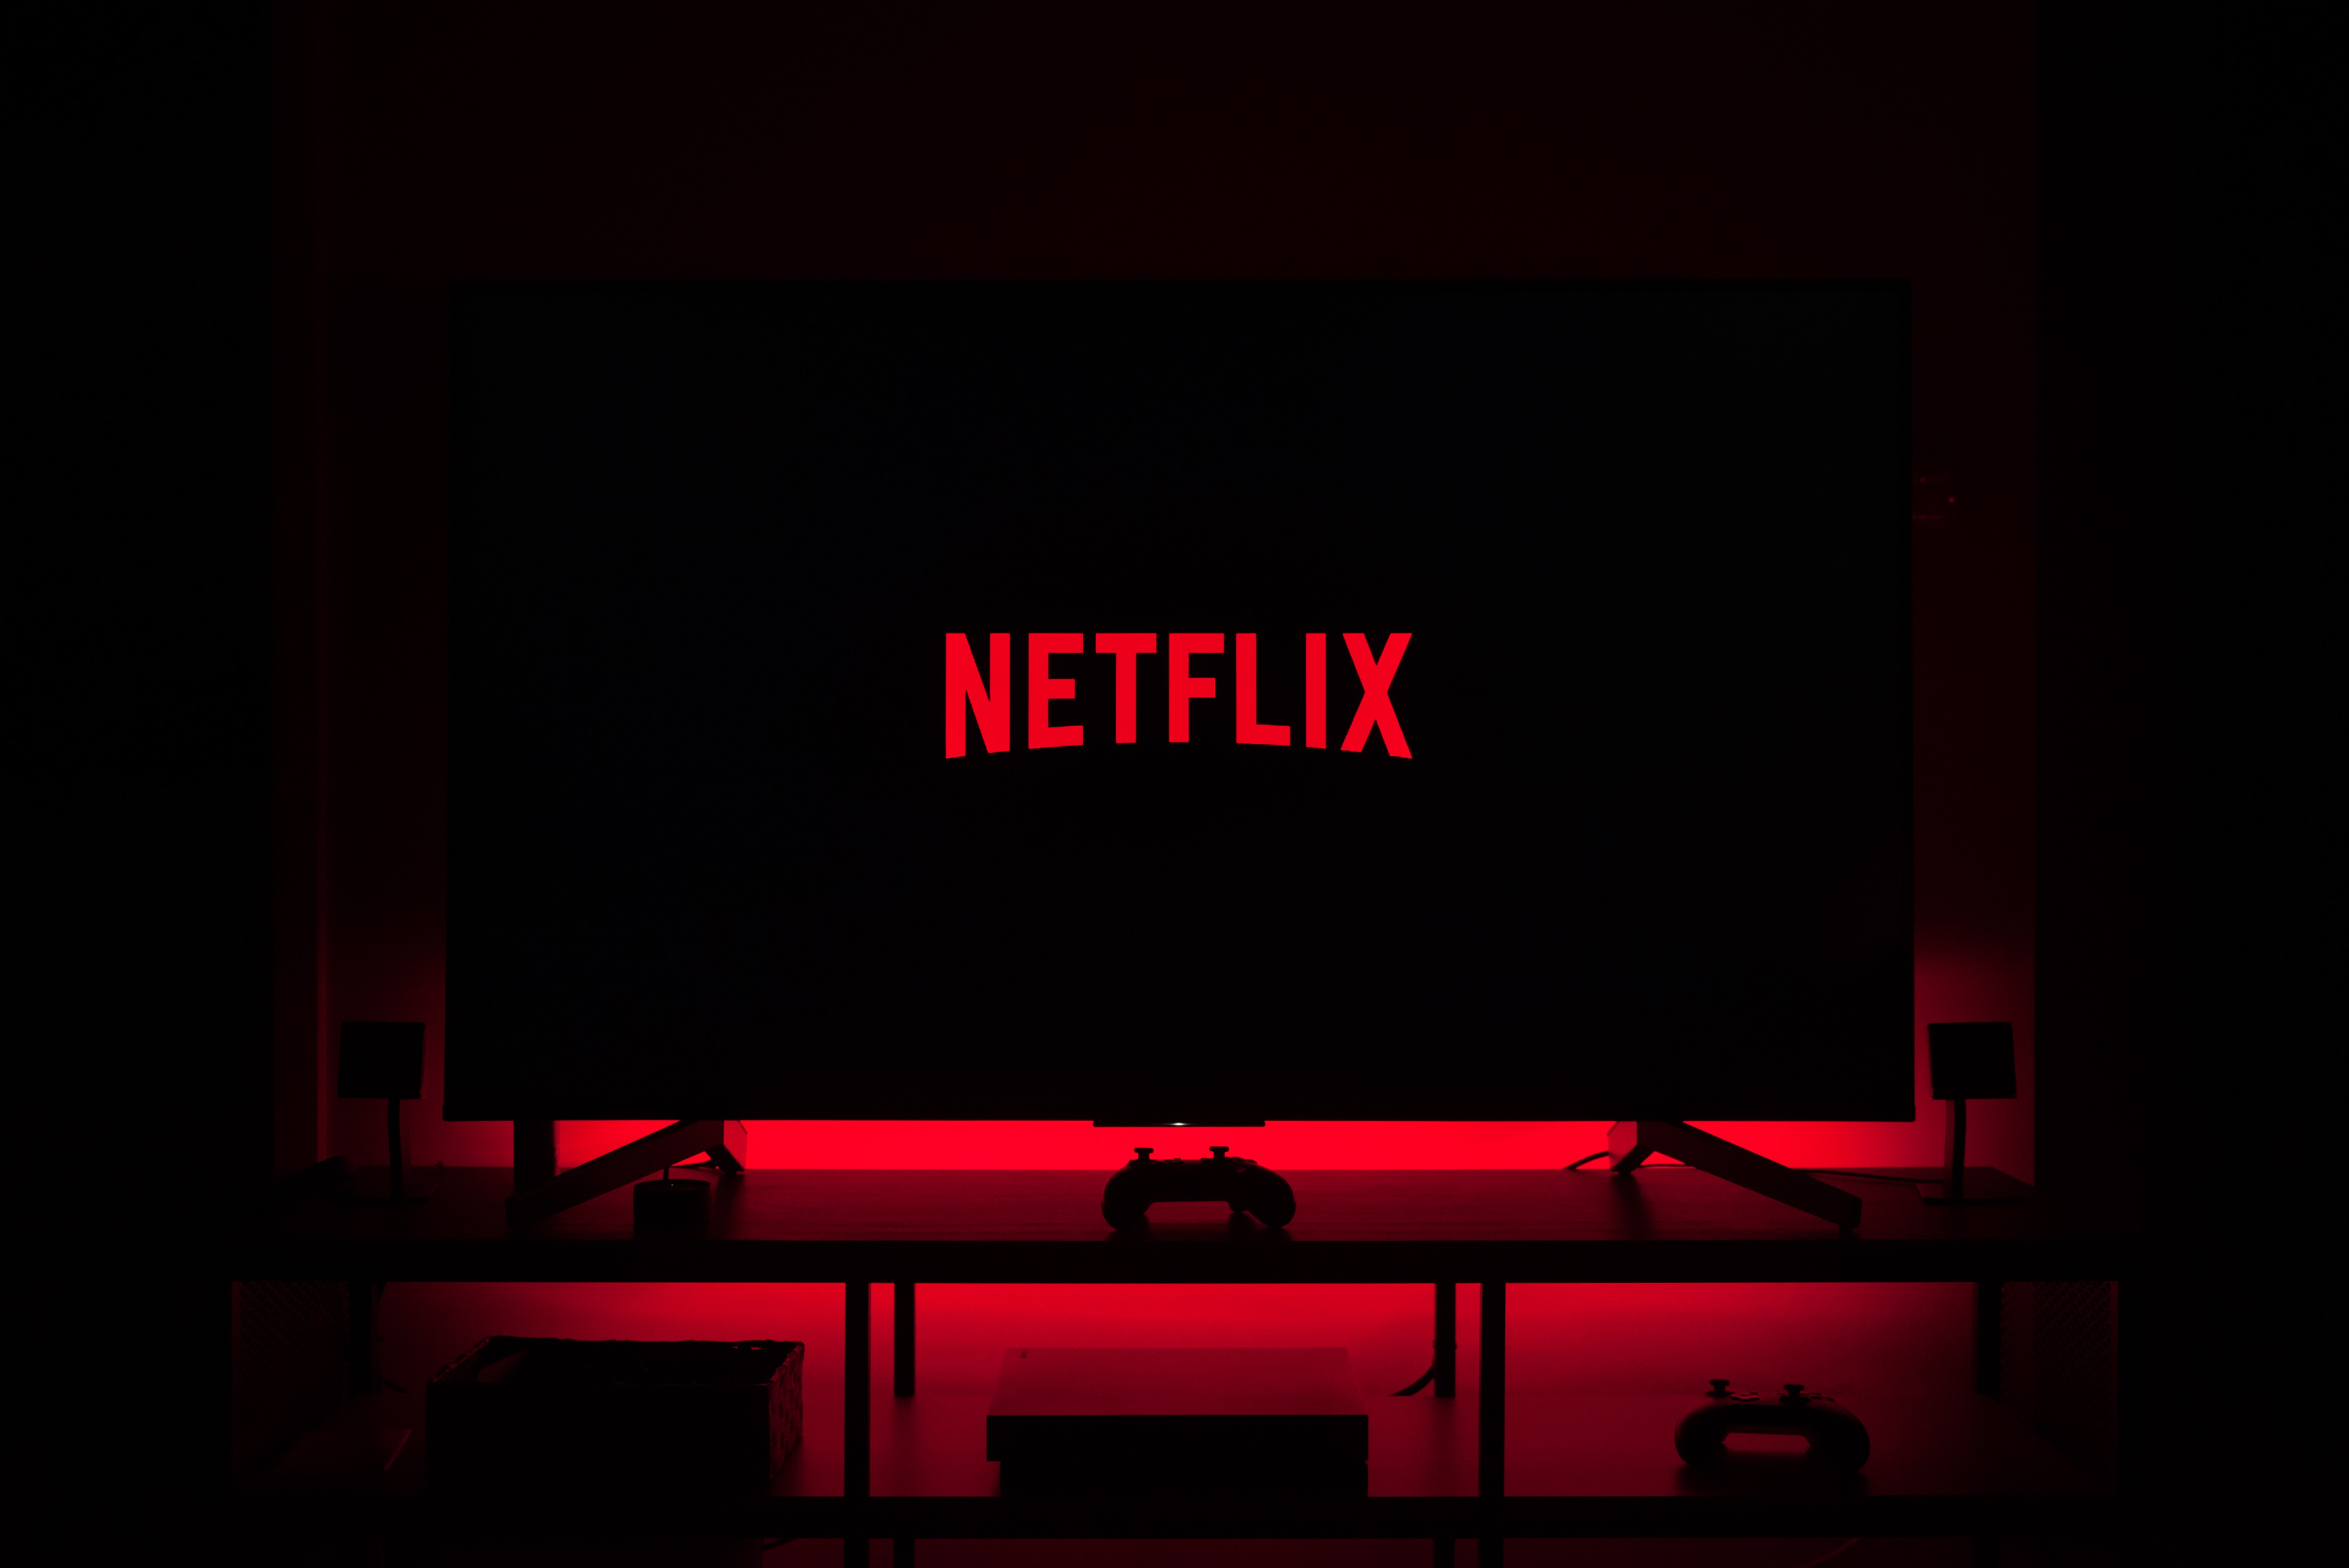
At Netflix, our goal is to entertain the world. Whatever your tastes and wherever you live, we give you access to world-class series, documentaries, feature films and mobile games. Our members choose what they want to watch, when they want it, completely ad-free, with one simple subscription. We stream in more than 30 languages and 190 countries because great stories can spring from anywhere and delight anywhere. We're the world's biggest fans of entertainment, always striving to help you find your next favorite story.

### 1. Firstly, I will load the friends data and visualize it
I will use the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 99, respectively.
I will create the list of years from 2011 to 2020. Also a list of movies duration respectively. Then I will create a dictonary from that list so we can visualize it!

In [2]:
#list of years
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020] 


#list of durations
duration=[103, 101, 99, 100, 100, 95, 95, 96, 93, 99]


#This is dictonary from lists
movies_dictionary={'years':years , 'duration':duration}
print(movies_dictionary)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'duration': [103, 101, 99, 100, 100, 95, 95, 96, 93, 99]}


#### Tabular form of data

Now I will convert this dictionary into tabular so we can visualize it!</br>
For this firstly we need to import panda library so we can work with it



In [3]:
#import pandas with shortcut 'pd'
import pandas as pd

#Dataframe from dictionary
movies_dataframe= pd.DataFrame(movies_dictionary)

print(movies_dataframe)


   years  duration
0   2011       103
1   2012       101
2   2013        99
3   2014       100
4   2015       100
5   2016        95
6   2017        95
7   2018        96
8   2019        93
9   2020        99


#### Visualization of data

By using the columns of the DataFrame I will create a line plot</br>
For this I will matplotlib library to show a plot


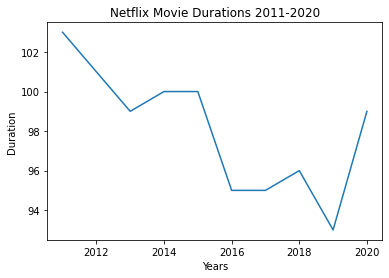

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()


# Draw a line plot of release_years and durations
plt.plot(movies_dataframe['years'],movies_dataframe['duration'] )
plt.xlabel('Years')
plt.ylabel('Duration')


# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.show()

## Use the rest of the data from csv file

The dataset I use for this analysis I downloaded it from kaggle (https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238&sortBy=dateRun&tab=bookmarked)

First I will clean the data 

From this dataset I don't need rating column. So I will delete the entire rating column.

Now our analysis based on duration, year, type & genre. So I will delete the row which has null value for anyone of these.



In [5]:
# Load the dataset in to dataframe
netflix_dataframe = pd.read_csv('dataset/netflix_data.csv')

# Print the first five rows of the DataFrame
netflix_dataframe.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


This dataset contains TV Shows as well. First I will work only with movies so we will filter movies.

Secondly, I need only type, title, duration, release year, genre. 

In [6]:
# Filter movies
netflix_dataframe_movies = netflix_dataframe[netflix_dataframe['type'] == 'Movie']

# Create dataframe of columns which we need to use
netflix_movies_columns= netflix_dataframe_movies.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# Check by print
netflix_movies_columns.head(5)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


Create a scatter plot from these


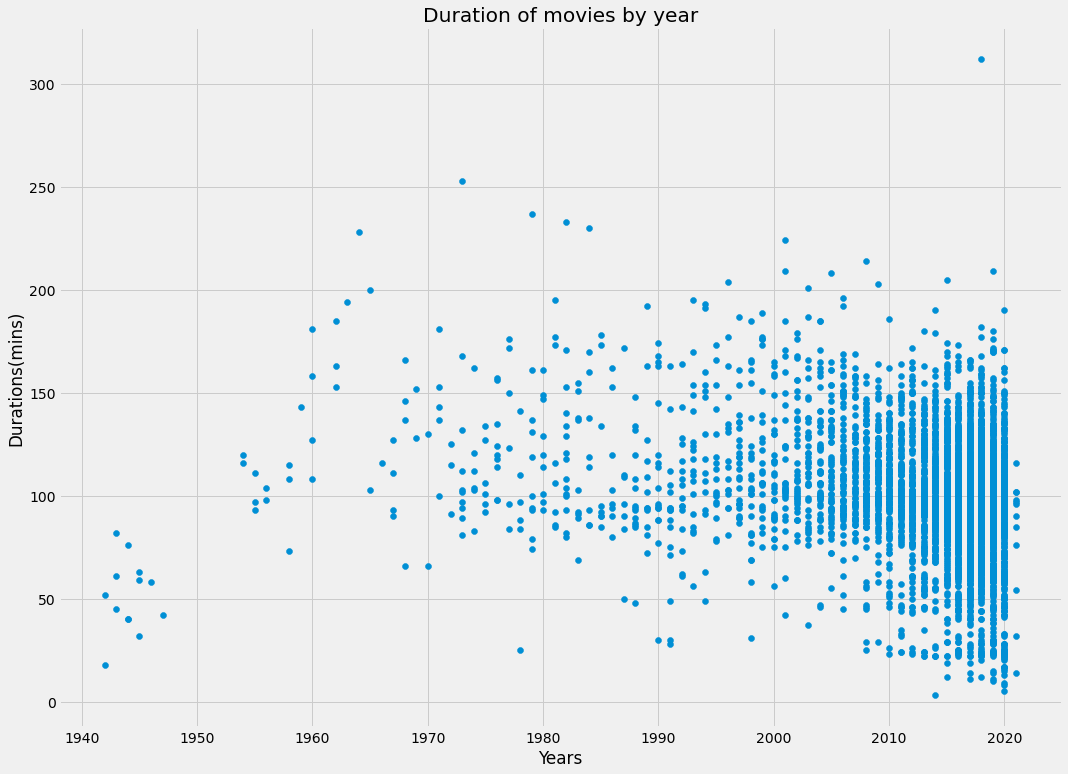

In [12]:
# Create a figure 
fig = plt.figure(figsize=(16,12))

# Scatter plot of year and duration
plt.scatter(netflix_movies_columns['release_year'], netflix_movies_columns['duration'])


plt.title('Duration of movies by year')
plt.xlabel('Years')
plt.ylabel('Durations(mins)')

# Show the plot
plt.show()

Include these there are many genres so I will try to give colors to different genres

In [8]:
# List of colors
colors = []

# Iterate over rows of netflix_movies_col_subset
for  lab,row in netflix_movies_columns.iterrows():
    if row['genre'] == 'Dramas':
        colors.append('red')
    elif row['genre'] == 'Horror Movies':
        colors.append('blue')
    elif row['genre'] == 'Action' :
        colors.append('green')
    elif row['genre'] == 'Documentaries' :
        colors.append('orange')
    elif row['genre'] == 'Comedies' :
        colors.append('deepskyblue')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[:12]

['red',
 'blue',
 'green',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'orange',
 'black',
 'red']

Again scatter plot with colors

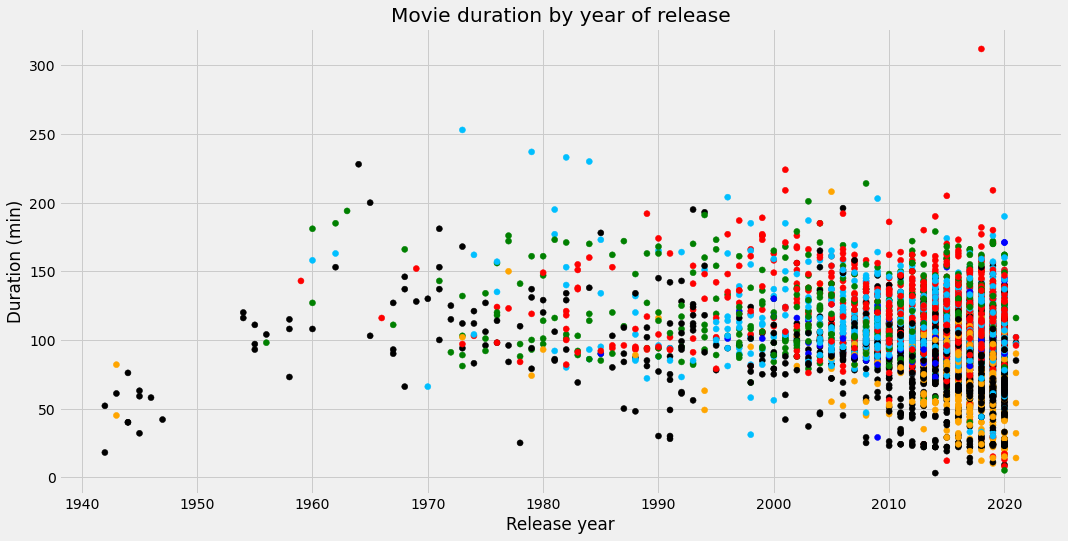

In [15]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(16,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_columns['release_year'], netflix_movies_columns['duration'], c=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

It can be seen that Documantaries(Orange) are short in durations. On the other hand Dramas(red) are long in duration.